# Importation des librairies 

In [1]:
import pandas as pd 
from numpy import*
import re
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et affichage des données

In [2]:
erp = pd.read_csv('erp.csv')
erp.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [93]:
web = pd.read_excel('web.xlsx')
web.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [6]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296


In [7]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


#  Analyse de forme (web)

In [94]:
# Utiliser une nouvelle variable pour l'analyse
web_copie= web.copy()

In [95]:
# Afficher les nombres des colonnes et des lignes dans la dataframe web_copie
web_copie.shape

(1513, 28)

<AxesSubplot:>

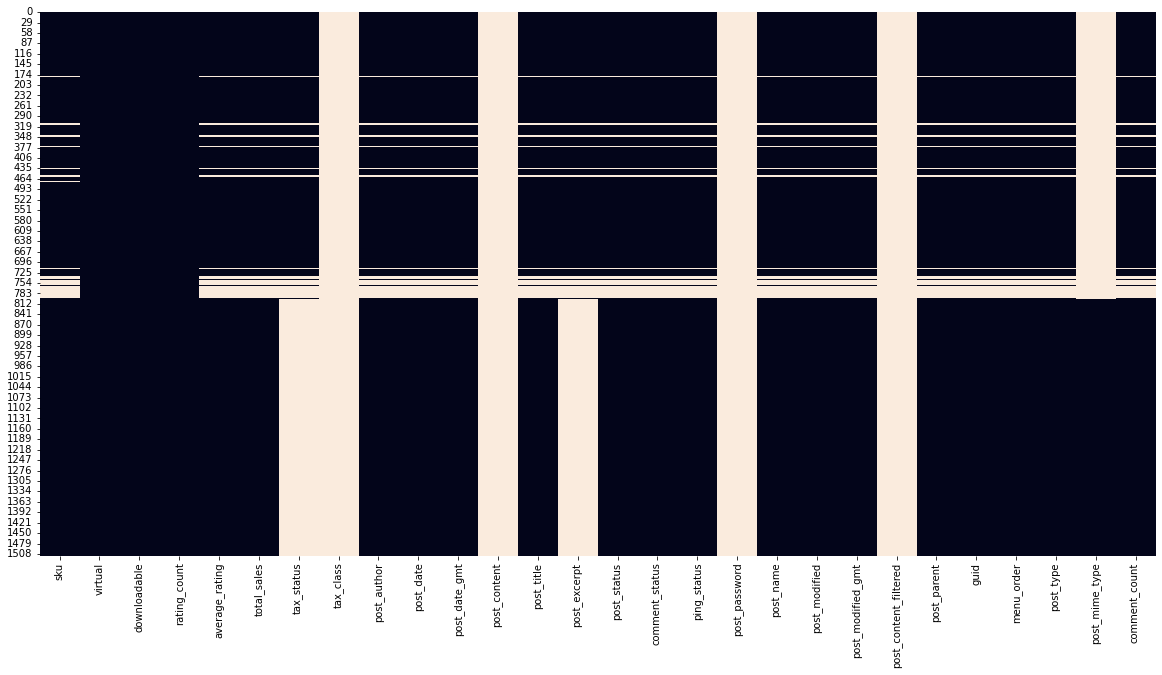

In [10]:
# Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( web_copie.isna(), cbar= False) # cbar=False pour elimimer la color bar

#### Conclusion 
##### Variable target: SKU
#####  Lignes et colonnes:1431,28
##### Types de variables: qualitatif:      quantitatif:
object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64
#####  Analyse des valeurs manquantes: il y a  4 groupe de colonnes 100% de valeurs manquantes et trois groupes de colonnes avec 50% de valeurs manquantes

In [96]:
# Ordre décroissant des pourcentages valeurs manquantes dans la dataframe web ( la somme des valeurs manquantes/le nb de lignes de notre tableau)
(web_copie. isna().sum()/ web_copie.shape [0]). sort_values( ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

# Analyse du fond

## Visualisation initiale : élimination des colonnes inutiles et nettoyage du fichier web

In [97]:
# Mettre que les valeur <1 donc qui ne sont pas des valeurs manquantes dans la dataframe web
web_copie= web_copie [web_copie.columns[web. isna().sum()/ web.shape [0] <1]]

In [13]:
# Détecter les valeurs manquantes dans web_copie
web_copie[web_copie['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Afficher les lignes avec des SKU qui ne sont des entiers pour détécter les valeurs manquantes 
web_copie_sku_non_numeric= web[pd.to_numeric(web['sku'], errors='coerce').isnull()]
web_copie_sku_non_numeric

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [79]:
# Supprimer les doublons basés sur les colonnes SKU et post_date (se sont des clés primaires )
web_copie_sku_non_numeric.drop_duplicates(subset=['sku', 'post_date'],inplace=True)
web_copie_sku_non_numeric

C:\Users\ibenz\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [80]:
# Supprimer les NAN basées sur les colonnes SKU et post_date 
web_copie_sku_non_numeric= web_copie_sku_non_numeric.dropna(how='all',subset=['sku', 'post_date'])
web_copie_sku_non_numeric

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [88]:
# Supprimer le SKU numero 797 puisqu'il représente un idenfiant, il nous reste les produits qui n'ont pas de SKU dans la dataframe web
web_copie_sku_non_numeric.drop(797, axis=0)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


#### Conclusion : il y a trois lignes où le sku est manquant , ils representent  les trois produits qui n'ont pas de SKU dans web qui sont : bon-cadeau-de-25-euros ,pierre-jean-villa-cote-rotie-fongeant-2017 et pierre-jean-villa-condrieu-suspendu-2018

In [112]:
# supprimer les doublons dans web
web_copie.drop_duplicates(inplace=True)

In [182]:
# supprimer les lignes qui ont des NAN à la fois dans les colonnes sku et post
web_copie= web_copie.dropna(how='all',subset=['sku', 'post_type'])

In [183]:
# Value_counts pour afficher le nombre de lignes uniques dans le DataFrame web_copie
web_copie['post_type'].value_counts()

product       716
attachment    714
Name: post_type, dtype: int64

In [189]:
# Utiliser groupby pour grouper les sku à chaque fois avec le post_type équivalent
group_sku_post_type= web_copie.groupby(['sku', 'post_type'],dropna=False).size()
group_sku_post_type

sku                  post_type 
38                   attachment    1
                     product       1
41                   attachment    1
                     product       1
304                  attachment    1
                                  ..
13127-1              attachment    1
                     product       1
bon-cadeau-25-euros  attachment    1
                     product       1
NaN                  product       2
Length: 1429, dtype: int64

In [188]:
# Vérifier que les post_type attachement et produit sont uniques partout dans web_copie appart deux lignes NAN sans importance pour le moment 
group_sku_post_type.describe()

count    1429.000000
mean        1.000700
std         0.026454
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
dtype: float64

#### On peut conclure qu'on a 714 lignes avec post_type product , également pour post_type attachement

In [187]:
#test2= web_copie.groupby(['sku', 'post_type']).size()
#test2

sku                  post_type 
38                   attachment    1
                     product       1
41                   attachment    1
                     product       1
304                  attachment    1
                                  ..
19822                product       1
13127-1              attachment    1
                     product       1
bon-cadeau-25-euros  attachment    1
                     product       1
Length: 1428, dtype: int64

In [170]:
#test2.describe()

count    1428.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

In [171]:
# Utiliser groupby pour savoir combien on a sku pour chaque post_type 
grouped_doublons = web_copie.groupby('sku')['post_type'].count() 
grouped_doublons

sku
38                     2
41                     2
304                    2
523                    2
531                    2
                      ..
19820                  2
19821                  2
19822                  2
13127-1                2
bon-cadeau-25-euros    2
Name: post_type, Length: 714, dtype: int64

In [172]:
# Vérifier toutes les lignes dans sku sont des doublons 
grouped.describe()

count    714.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: post_type, dtype: float64

In [151]:
#web_copie.agg({'post_type' : ['value_counts'], 'sku' :['value_counts']})

,post_type,sku
,value_counts,value_counts
product,716.0,NaN
attachment,714.0,NaN
bon-cadeau-25-euros,NaN,2.0
14828,NaN,2.0
14679,NaN,2.0
...,...,...
15145,NaN,2.0
15801,NaN,2.0
15452,NaN,2.0


In [111]:
#web_copie.post_type.unique()

array(['product', 'attachment'], dtype=object)

In [23]:
web_copie[ web_copie['post_type'] == 'attachment' ] .index

Int64Index([ 799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
            ...
            1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512],
           dtype='int64', length=714)

In [24]:
web_copie.drop( web_copie[ web_copie['post_type'] == 'attachment' ].index , inplace=True)

In [25]:
# Afficher le nombre de valeurs unique dans chaque colonne 
web_copie.nunique().tolist

<bound method IndexOpsMixin.tolist of sku                  714
virtual                1
downloadable           1
rating_count           1
average_rating         1
total_sales           41
tax_status             1
post_author            2
post_date            714
post_date_gmt        714
post_title           711
post_excerpt         677
post_status            1
comment_status         1
ping_status            1
post_name            714
post_modified        587
post_modified_gmt    587
post_parent            1
guid                 714
menu_order             1
post_type              1
post_mime_type         0
comment_count          1
dtype: int64>

In [26]:
# Supprimer les colonnes qui n'ont qu'une seule valeur 
web_copie=web_copie.drop(['virtual', 'downloadable' ,'rating_count','tax_status','menu_order','post_type','post_mime_type','comment_count','average_rating','post_parent','ping_status','post_status','comment_status'], axis = 1)

In [27]:
# somme des valeurs nulls 
web_copie.isnull().sum()

sku                  0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_excerpt         0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
dtype: int64

#### Pas de doublons et pas de valeurs nulls dans la colonne SKU, on peut donc conclure que c'est une clé primaire

In [191]:
web_copie.describe(include = ['O'])

,sku,tax_status,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,guid,post_type,post_mime_type
count,1428,716,1430,716,1430,1430,1430,1430,1430,1430,714
unique,714,1,713,679,1,1,1,716,1430,2,1
top,bon-cadeau-25-euros,taxable,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product,image/jpeg
freq,2,716,4,12,1430,1430,1430,2,1,716,714


In [197]:
web_copie['que'] = np.where((web_copie['post_title'] == web_copie['post_name']) 
                     , web_copie['post_title'], np.nan)

In [219]:
colonnes_selectionnees_web = web_copie[["post_title","post_name","que"]].copy()
colonnes_selectionnees_web.sample(10)

,post_title,post_name,que
1505,Château Jean Faure Saint-Emilion Grand Cru 2015,jean-faure-saint-emilion-grand-cru-2015,NaN
584,Camille Giroud Santenay Rouge 2016,camille-giroud-santenay-rouge-2016,NaN
1103,Albert Mann Muscat 2018,albert-mann-muscat-2018,NaN
812,Pierre Gaillard Saint-Joseph Rouge 2018,pierre-gaillard-saint-joseph-2018,NaN
15,Pierre Gaillard Saint-Joseph Blanc 2019,pierre-gaillard-saint-joseph-blanc-2019,NaN
1192,Cave de Castelmaure Corbières Rouge Vigneron 2018,cave-de-castelmaure-corbieres-rouge-vigneron-2018,NaN
568,Triennes IGP Méditerranée Rouge Merlot 2016,triennes-igp-mediterranee-rouge-merlot-2016,NaN
268,Marcel Windholtz Eau de Vie de Mirabelle d'Als...,marcel-windholtz-eau-de-mirabelle-dalsace-rese...,NaN
581,Camille Giroud Marsannay Rouge Les Longeroies ...,camille-giroud-marsannay-longeroies-2016,NaN
654,Château de La Liquière Faugères L'Ampoule 2019,chateau-de-la-liquiere-faugeres-ampoule-2019,NaN


In [204]:
colonnes_selectionnees_web['post_title'].value_counts()

Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                   4
Domaine Hauvette IGP Alpilles Jaspe 2017                                       4
Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016    4
Decelle-Villa Meursault 2018                                                   2
Domaine Saint-Nicolas Fiefs Vendéens Rouge La Grande Pièce 2013                2
                                                                              ..
Gilbert Picq Chablis Vieilles Vignes 2017                                      2
Gilbert Picq Chablis 2017                                                      2
Domaine Saint-Nicolas Vin de France Blanc Les Clous 2019                       2
Pierre Jean Villa Condrieu Jardin Suspendu 2018                                1
Pierre Jean Villa Côte Rôtie Fongeant 2017                                     1
Name: post_title, Length: 713, dtype: int64

In [206]:
colonnes_selectionnees_web.describe()

,post_title,post_name,que
count,1430,1430,0
unique,713,716,0
top,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,bon-cadeau-de-25-euros,NaN
freq,4,2,NaN


In [201]:
colonnes_selectionnees_web.value_counts()

Series([], dtype: int64)

In [28]:
# Supprimer les doublons dans la dataframe web
web_copie.drop_duplicates(inplace=True)

<AxesSubplot:ylabel='None'>

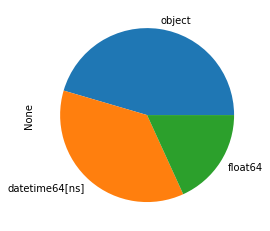

In [29]:
web_copie.dtypes.value_counts().plot.pie()

In [30]:
web_copie.describe()

,total_sales,post_author
count,714.000000,714.000000
mean,4.012605,1.998599
std,8.518183,0.037424
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,2.000000
75%,4.000000,2.000000
max,96.000000,2.000000


#  Analyse de forme (erp)

In [31]:
# utiliser une nouvelle variable pour l'analyse
erp_copie= erp.copy()

In [32]:
# Afficher les nombres des colonnes et des lignes dans la dataframe erp_copie
erp_copie.shape

(825, 5)

In [33]:
# Afficher les types des données dans la dataframe erp_copie
erp_copie.dtypes.value_counts()

int64      3
float64    1
object     1
dtype: int64

<AxesSubplot:>

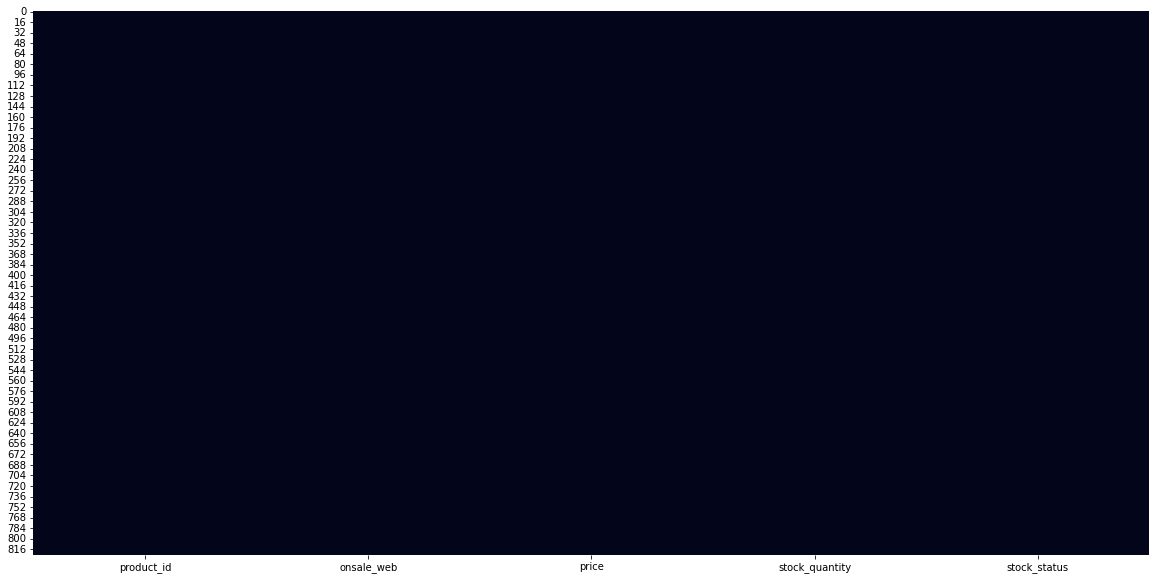

In [34]:
 # Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( erp.isna(), cbar= False) # cbar=False pour elimimer la color bar

# Conclusion
##### Variable target: price
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: pas de NAN ( valeurs manquantes) 

# Analyse du fond ( ERP)

In [35]:
# Supprimer les doublons de la dataframe erp_copie
erp_copie.drop_duplicates(inplace=True)

In [36]:
erp_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 38.7+ KB


In [37]:
# Afficher le nombre de valeurs unique dans chaque colonne 
erp_copie.nunique().tolist

<bound method IndexOpsMixin.tolist of product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64>

In [38]:
# compter le nombres des valeurs nulls dans chauque colonne 
erp_copie.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

<AxesSubplot:ylabel='None'>

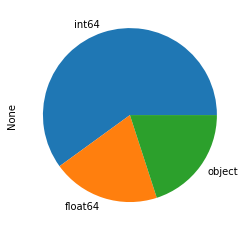

In [39]:
erp_copie.dtypes.value_counts().plot.pie()

In [40]:
erp_copie.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


#### Pas de doublons et pas de valeurs nulls dans la colonne product_id , on peut donc conclure que c'est  une clé primaire 

#  Analyse de forme (liaison)

In [41]:
# utiliser une nouvelle variable pour l'analyse
liaison_copie= liaison.copy()

In [42]:
# Afficher les nombres des colonnes et des lignes dans la dataframe liaison_copie
liaison_copie.shape

(825, 2)

In [43]:
# Afficher les types des données dans la dataframe liaison_copie
liaison_copie.dtypes.value_counts()

int64     1
object    1
dtype: int64

In [44]:
# Afficher le nombre de valeurs unique dans chaque colonne 
liaison_copie.nunique().tolist

<bound method IndexOpsMixin.tolist of product_id    825
id_web        734
dtype: int64>

In [45]:
liaison_copie.isnull().sum()

product_id     0
id_web        91
dtype: int64

#### Pas de doublons et pas de valeurs nulls dans la colonne product_id , on peut donc conclure que c'est  une clé primaire 

<AxesSubplot:>

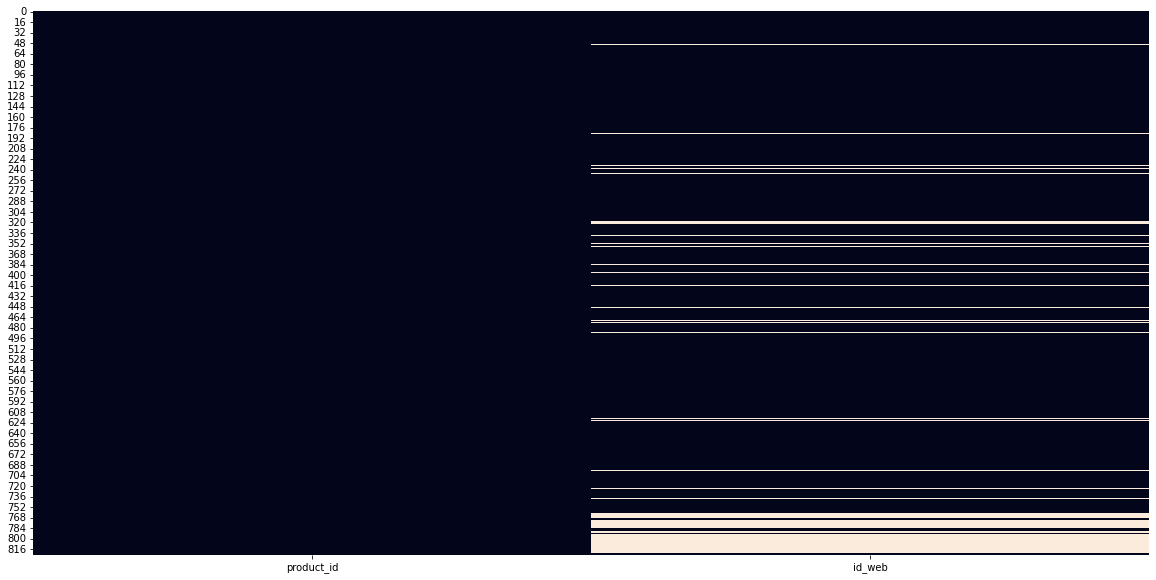

In [46]:
# Utiliser tt d'abord la fonction.isna () de pandas pour verifier les valeurs NaN
#Utiliser la fonction heatmap de seaborn pour afficher notre dataset 
plt.figure( figsize=(20,10)) # Afficher le graphique plus grand avec les dimensions 20,10
sns.heatmap( liaison_copie.isna(), cbar= False) # cbar=False pour elimimer la color bar 

# Conclusion
##### Variable target: product_id
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: peu de NAN ( valeurs manquantes) 

In [47]:
# supprimer les doublons dans la data liaison_copie
liaison_copie.drop_duplicates(inplace=True)
liaison_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


<AxesSubplot:ylabel='None'>

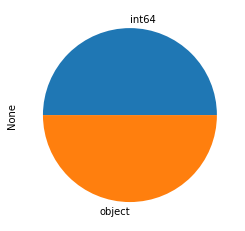

In [48]:
liaison_copie.dtypes.value_counts().plot.pie()

In [49]:
liaison_copie.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


# Vérification des incohérences 

In [50]:
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_author        714 non-null    float64       
 3   post_date          714 non-null    datetime64[ns]
 4   post_date_gmt      714 non-null    datetime64[ns]
 5   post_title         714 non-null    object        
 6   post_excerpt       714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified      714 non-null    datetime64[ns]
 9   post_modified_gmt  714 non-null    datetime64[ns]
 10  guid               714 non-null    object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 66.9+ KB


In [51]:
lst= web_copie['sku'].tolist() # creer une liste 
for i in lst: # une boucle ou i dans notre liste 
    if isinstance(i,int):# si dans notre colonne on a le type int
        continue # on continue 
    else: # sinon  
        print (i,"un type différent ") # afficher i comme un type différent de int

bon-cadeau-25-euros un type différent 
13127-1 un type différent 


In [52]:
# Vérifier le stock quantity 0 et son état de stock s'il est 'instock'
erp_copie[(erp_copie['stock_quantity']==0 )& (erp_copie['stock_status']=='instock')]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [53]:
# savoir c quoi le produit 443 avec à comme stock après la jointure 

# Jointure entre les dataframes 

In [54]:
# merger les deux dataframes erp_copie et liaison_copie how= outer
erp_liaison = pd.merge (erp_copie,liaison_copie , on = 'product_id', how = 'outer' )
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [55]:
# Changer le type de la colonne product_id en object pour pouvoir merger après avec la data web
erp_liaison["product_id"] = erp_liaison["product_id"]. astype (str)

In [238]:
# Renommer la colonne SKU dans la data web pour pouvoir merger on id_web après erp_liaison
web_copie=web_copie.rename( columns={"sku": "id_web"})

In [57]:
# Merger les deux dataframes web_copie et erp_liaison how= outer
erp_liaison_web= pd. merge(web_copie, erp_liaison , on='id_web', how='outer',indicator=True)
erp_liaison_web

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,both
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock,both
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock,both
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock,both
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,right_only
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,right_only
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,right_only
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,right_only


In [250]:
# incohérences dans la dataframe 
erp_liaison_web[(erp_liaison_web['stock_quantity']==0 ) & (erp_liaison_web['stock_status']== 'instock' )]

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit,Gamme
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,both,250.0,Normal


In [59]:
analyse_correspondance_both = erp_liaison_web['_merge'].str.contains(r'both').sum()
analyse_correspondance_both

714

In [60]:
analyse_correspondance_web= erp_liaison_web['_merge'].str.contains(r'left_only').sum()
analyse_correspondance_web

0

In [61]:
analyse_correspondance_erp=erp_liaison_web['_merge'].str.contains(r'right_only').sum()
analyse_correspondance_erp

111

In [62]:
non_correspondance_web=erp_liaison_web.loc[erp_liaison_web['_merge']=='right_only']
non_correspondance_web

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge
714,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4055,0,86.1,0,outofstock,right_only
715,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4090,0,73.0,0,outofstock,right_only
716,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4092,0,47.0,0,outofstock,right_only
717,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4195,0,14.1,0,outofstock,right_only
718,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4209,0,73.5,0,outofstock,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,right_only
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,right_only
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,right_only
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,right_only


In [232]:
# utiliser .loc pour trouver les produits avec right_only mais qui ont onsale_web=1 se sont des incohérence
right_only_onsale_web = erp_liaison_web.loc[(erp_liaison_web["_merge"] == "right_only") & (erp_liaison_web["onsale_web"] == 1)]
right_only_onsale_web

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit,Gamme
725,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4594,1,144.0,0,outofstock,right_only,NaN,Premium
742,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5070,1,84.7,0,outofstock,right_only,NaN,Normal
743,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5075,1,43.3,0,outofstock,right_only,NaN,Normal


In [243]:
liaison_web = pd.merge (web_copie,liaison_copie , on = 'id_web', how = 'outer',indicator=True )
liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_counts,que,product_id,_merge
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN,4954,both
1,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN,NaN,4954,both
2,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN,3847,both
3,15298,0.0,0.0,0.0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,NaN,NaN,3847,both
4,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN,3849,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5954,right_only
1626,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5955,right_only
1627,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957,right_only
1628,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6100,right_only


In [249]:
right_only_liaison_web = liaison_web.loc[(liaison_web["_merge"] == "right_only")]
right_only_liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_counts,que,product_id,_merge
1610,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4289,right_only
1611,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4568,right_only
1612,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4584,right_only
1613,12601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4741,right_only
1614,15154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4864,right_only
1615,14360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4869,right_only
1616,15608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4921,right_only
1617,15586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4922,right_only
1618,15272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5018,right_only
1619,15630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021,right_only


### Analyse des lignes qui n'ont pas eu de correspondance
#### Touts les produits commercialisés en ligne ont une correspondance dans l'ERP du magasin par contre il y a 111 produits dans l'ERP du magasin qui n'ont pas de correspondance en ligne,vous trouvez ci-dessus les 111 produits pour essayer de trouver une solution pour les integrer en ligne 

In [236]:
liaison_copie.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [237]:
web_copie.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,sku_counts,que
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,NaN,NaN


# Calcul du CA total 

In [63]:
# Ajouter une colonne dans le tableau de la data erp_laison_web et calculer le chiffre d'affaire par produit en utilisant la multiplication
erp_liaison_web ["CA_par_produit"] = erp_liaison_web["total_sales"] * erp_liaison_web["price"]
erp_liaison_web

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,both,250.0
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock,both,145.2
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock,both,0.0
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock,both,0.0
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock,both,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,right_only,NaN
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,right_only,NaN
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,right_only,NaN
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,right_only,NaN


In [64]:
# Ordre décroissant du chiffre d'affaires par produit 
erp_liaison_web=erp_liaison_web.sort_values(by='CA_par_produit', ascending=False)
erp_liaison_web

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit
195,7818,96.0,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,4334,1,49.0,0,outofstock,both,4704.0
72,1662,87.0,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,4144,1,49.0,11,instock,both,4263.0
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,2288.0
71,11641,30.0,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,4142,1,53.0,8,instock,both,1590.0
70,304,40.0,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,4141,1,39.0,1,instock,both,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,right_only,NaN
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,right_only,NaN
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,right_only,NaN
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,right_only,NaN


In [65]:
# Calculer le chiffre d'affaires Total en euro
CA_total_enligne= erp_liaison_web['CA_par_produit'].sum()
CA_total_enligne

70568.6

#### Le chiffre d'affaire total est de 70 milles 568 euros entre le 08/02/2018 et le 20/07/2020 

# Analyse 

total_sales
post_author
price
CA_par_produit


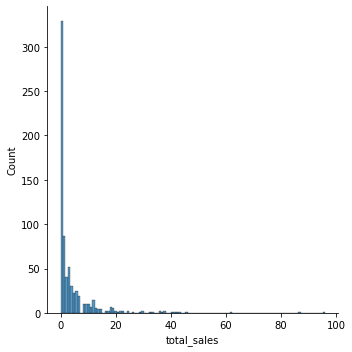

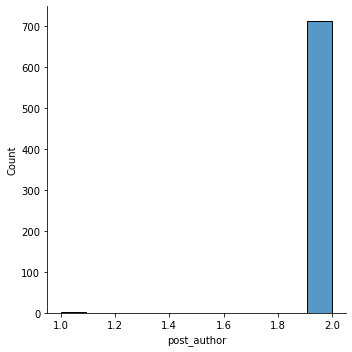

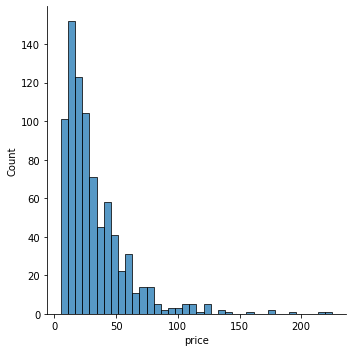

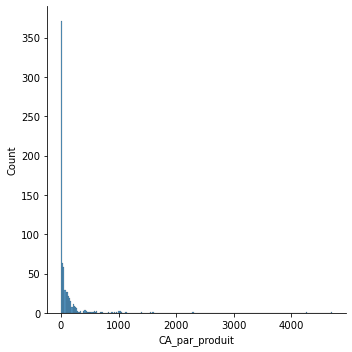

In [66]:
for col in erp_liaison_web.select_dtypes('float'):
    print(col)
    sns.displot(erp_liaison_web[col])

<AxesSubplot:xlabel='price'>

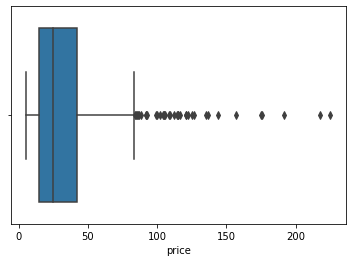

In [67]:
# boxplot dans seaborn pour afficher un diagramme en moustache pour visualiser les valeurs aberrantes 
sns.boxplot (x=erp_liaison_web['price'])

In [266]:
# détecter les valeurs aberrantes 
outliers = [] # une liste ds laquelle je vais mettre les valeurs aberrantes 
def detect_outliers(data): # définir une fonction , on a comme entrée data
    threshold=3 # la limite à partir de laquelle je vais dire que c une valeur aberrante ( paramètre)
    mean= np.mean(data) # moyenne = nympy. la moyenne de la data ( les donnée d'entree)
    std=np.std(data) 
    for i in data: # on parcourt les données
        z_score= (i-mean)/std # on mesure le z_score pour chaque i donc pour chaque price 
        if np.abs(z_score)> threshold: # on fais une comparaison 
             outliers.append(i) # on les ajoute dans notre liste 
    return outliers # on ferme la boucle 

In [269]:
mean_T= np.mean(erp_liaison_web['price'])
mean_T


32.415636363636345

In [271]:
std_t=np.std(erp_liaison_web['price'])
std_t

26.779604366935402

In [257]:
erp_liaison_web.describe(include = ['O'])

,id_web,post_title,post_excerpt,post_name,guid,product_id,stock_status,Gamme
count,734,714,714,714,714,825,825,825
unique,734,711,677,714,714,825,2,2
top,7818,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Les eaux de vie naissent d'une subtile alchimi...,champagne-gosset-grand-blanc-de-blanc,https://www.bottle-neck.fr/?post_type=product&...,4334,instock,Normal
freq,1,2,12,1,1,1,638,807


In [267]:
print (detect_outliers(erp_liaison_web['price']))

[176.0, 126.5, 225.0, 137.0, 191.3, 135.0, 115.0, 175.0, 114.0, 122.0, 116.4, 121.0, 121.0, 115.0, 157.0, 124.8, 217.5, 144.0]


In [265]:
#data =[5,10,15,20,25,30,36,22]
#data.append(180)
#data = pd.DataFrame(data, columns = ["Data"])
import scipy.stats as stats
from scipy.stats import zscore
z = np.abs(stats.zscore(erp_liaison_web['price']))
#print(z)
print(np.where( z > 3))

(array([  2,   5,   6,  19,  24,  49,  64, 400, 472, 475, 501, 506, 509,
       512, 599, 615, 696, 725], dtype=int64),)


In [ ]:
# détecter les valeurs aberrantes 
outliers_test = [] # une liste ds laquelle je vais mettre les valeurs aberrantes 
def detect_outliers_test(data): # définir une fonction , on a comme entrée data
    threshold=3 # la limite à partir de laquelle je vais dire que c une valeur aberrante ( paramètre)
    mean= np.mean(data) # moyenne = nympy. la moyenne de la data ( les donnée d'entree)
    std=np.std(data)
    
    for i in data: # on parcourt les données
        z_score= (i-mean)/std # on mesure le z_score pour chaque i donc pour chaque price 
        if np.abs(z_score)> threshold: # on fais une comparaison 
             outliers.append(i) # on les ajoute dans notre liste 
    return outliers # on ferme la boucle 

In [261]:
Gamme= []
for value in erp_liaison_web["price"]:
    if value in detect_outliers(erp_liaison_web['price']):
        Gamme.append("Premium")
    else:
        Gamme.append("Normal")
erp_liaison_web["Gamme"] = Gamme 

In [71]:
erp_liaison_web_1=erp_liaison_web.sort_values(by='price', ascending=False)
erp_liaison_web_1.head()

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit,Gamme
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,1125.0,Premium
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,both,0.0,Premium
587,14983,3.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,5892,1,191.3,10,instock,both,573.9,Premium
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,2288.0,Premium
553,15185,0.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,5767,1,175.0,12,instock,both,0.0,Premium


In [72]:
erp_liaison_web_premium=erp_liaison_web_1.loc[erp_liaison_web_1['Gamme'] =='Premium']
erp_liaison_web_premium

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit,Gamme
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,1125.0,Premium
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,both,0.0,Premium
587,14983,3.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,5892,1,191.3,10,instock,both,573.9,Premium
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,2288.0,Premium
553,15185,0.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,5767,1,175.0,12,instock,both,0.0,Premium
222,7819,0.0,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,4406,1,157.0,3,instock,both,0.0,Premium
725,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4594,1,144.0,0,outofstock,right_only,NaN,Premium
382,14220,5.0,2.0,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,"Ce Corton Charlemagne éblouit par son assise, ...",domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,https://www.bottle-neck.fr/?post_type=product&...,4904,1,137.0,13,instock,both,685.0,Premium
642,14923,2.0,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,6126,1,135.0,10,instock,both,270.0,Premium
202,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,both,1391.5,Premium


In [73]:
erp_liaison_web_premium["CA_par_produit_premium"]=erp_liaison_web_premium["total_sales"]*erp_liaison_web_premium["price"]
erp_liaison_web_premium.head(2)

C:\Users\ibenz\AppData\Local\Temp/ipykernel_16684/3861571976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erp_liaison_web_premium["CA_par_produit_premium"]=erp_liaison_web_premium["total_sales"]*erp_liaison_web_premium["price"]


,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA_par_produit,Gamme,CA_par_produit_premium
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,1125.0,Premium,1125.0
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,both,0.0,Premium,0.0


In [74]:
Ca_total_premium= erp_liaison_web_premium['CA_par_produit_premium'].sum()
Ca_total_premium

6563.4

In [75]:
prop_CA_premium=Ca_total_premium/CA_total_enligne
round(prop_CA_premium,2)

0.09